In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv("data/Team Project cleaned.csv")
data.head()

,cid,datadate,fyear,fyr,act,at,capx,ceq,che,cogs,...,ei,ncl,busdescLength,td,te,profit_margin,der,cr,pctg_invt_at,pctg_ppe_at
0,3156,20181231,2018,12,8637.0,60580.0,3745.0,-169.0,4914.0,31365.0,...,0.0,42653.0,90,34029.0,-5307.0,0.031701,-6.412097,0.477288,0.025124,0.857428
1,3156,20201231,2020,12,11095.0,62008.0,1958.0,-6867.0,7473.0,22290.0,...,0.0,52306.0,90,41021.0,-20634.0,-0.512488,-1.988029,0.669624,0.026029,0.821071
2,3156,20151231,2015,12,9985.0,48415.0,6151.0,5635.0,6949.0,25416.0,...,0.0,29175.0,90,20561.0,-327.0,0.185655,-62.877676,0.733921,0.017825,0.793762
3,3156,20161231,2016,12,10324.0,51274.0,5731.0,3785.0,6997.0,25695.0,...,0.0,33617.0,90,24344.0,342.0,0.066600,71.181287,0.744233,0.021336,0.798650
4,3156,20141231,2014,12,12112.0,43771.0,5311.0,2021.0,8077.0,29511.0,...,0.0,28315.0,90,17904.0,-11100.0,0.067573,-1.612973,0.901526,0.022938,0.723287


In [3]:
data_audit = data[(data.AUDIT_FEES.isna()==False)]
data_audit.to_csv("data/Team Project AuditFees version.csv")
data_audit.head()

,cid,datadate,fyear,fyr,act,at,capx,ceq,che,cogs,...,ei,ncl,busdescLength,td,te,profit_margin,der,cr,pctg_invt_at,pctg_ppe_at
0,3156,20181231,2018,12,8637.0,60580.0,3745.0,-169.0,4914.0,31365.0,...,0.0,42653.0,90,34029.0,-5307.0,0.031701,-6.412097,0.477288,0.025124,0.857428
1,3156,20201231,2020,12,11095.0,62008.0,1958.0,-6867.0,7473.0,22290.0,...,0.0,52306.0,90,41021.0,-20634.0,-0.512488,-1.988029,0.669624,0.026029,0.821071
2,3156,20151231,2015,12,9985.0,48415.0,6151.0,5635.0,6949.0,25416.0,...,0.0,29175.0,90,20561.0,-327.0,0.185655,-62.877676,0.733921,0.017825,0.793762
3,3156,20161231,2016,12,10324.0,51274.0,5731.0,3785.0,6997.0,25695.0,...,0.0,33617.0,90,24344.0,342.0,0.066600,71.181287,0.744233,0.021336,0.798650
4,3156,20141231,2014,12,12112.0,43771.0,5311.0,2021.0,8077.0,29511.0,...,0.0,28315.0,90,17904.0,-11100.0,0.067573,-1.612973,0.901526,0.022938,0.723287


[Text(0, 0.5, 'Mean Total Assets'), Text(0.5, 0, 'FFI12_desc')]

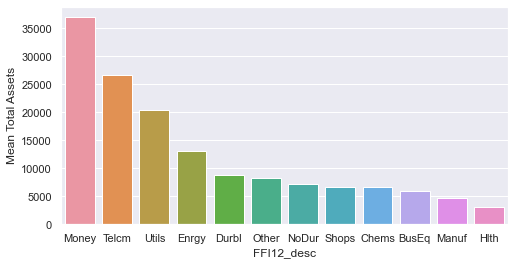

In [6]:
industry_audit_fees = data_audit.groupby("FFI12_desc").mean()[["at"]].reset_index()
industry_audit_fees.sort_values(by="at", inplace=True, ascending=False)

sns.set(rc={'figure.figsize':(8,4)})
sns.barplot(industry_audit_fees.FFI12_desc, industry_audit_fees["at"]).set(xlabel='FFI12_desc', ylabel='Mean Total Assets')

In [15]:
audit_at = data[["AUDIT_FEES", "d_fortune", "FFI12_desc"]]
audit_at["AUDIT_FEES"] = np.log(audit_at["AUDIT_FEES"] + 1)
audit_at["d_fortune"] = np.log(audit_at["d_fortune"] + 1)
audit_at.head()

<ipython-input-15-b22f54249623>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  audit_at["AUDIT_FEES"] = np.log(audit_at["AUDIT_FEES"] + 1)
<ipython-input-15-b22f54249623>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  audit_at["d_fortune"] = np.log(audit_at["d_fortune"] + 1)


,AUDIT_FEES,d_fortune,FFI12_desc
0,15.204302,0.000000,Other
1,15.126543,0.000000,Other
2,15.180326,0.693147,Other
3,15.180326,0.693147,Other
4,15.732433,0.693147,Other


[Text(0, 0.5, 'log(AUDIT_FEES)'), Text(0.5, 0, 'log(d_fortune)')]

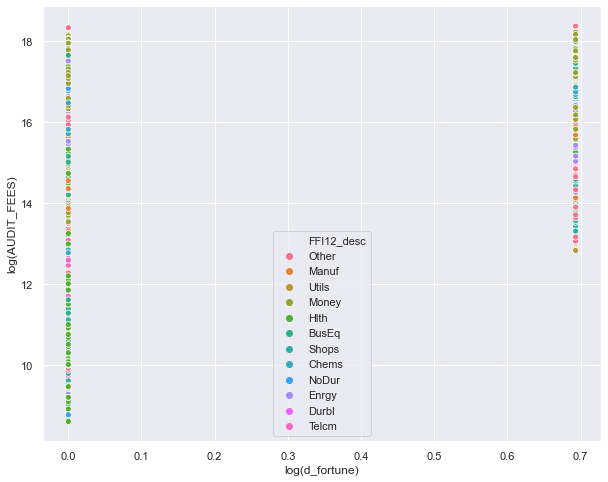

In [16]:
sns.set(rc={'figure.figsize':(10,8)})
sns.scatterplot(audit_at["d_fortune"], audit_at.AUDIT_FEES, hue=audit_at.FFI12_desc).set(xlabel='log(d_fortune)', ylabel='log(AUDIT_FEES)')

In [10]:
sns.color_palette()

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

In [4]:
print("Data cleaned:")
print(f"Rows: {data.shape[0]}")
print(f"Columns: {data.shape[1]}")
print(f"CID count: {data.cid.nunique()}")
print()
print("Data AuditFees cleaned:")
print(f"Rows: {data_audit.shape[0]}")
print(f"Columns: {data_audit.shape[1]}")
print(f"CID count: {data_audit.cid.nunique()}")

Data cleaned:
Rows: 34056
Columns: 121
CID count: 5071

Data AuditFees cleaned:
Rows: 22795
Columns: 121
CID count: 3468


In [5]:
# replace NA values in busdesc with empty string
data.loc[pd.isna(data.busdesc), "busdesc"] = ""
data_audit.loc[pd.isna(data_audit.busdesc), "busdesc"] = ""

/Users/cherylperyl/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [6]:
# # to get NA_counts for the data
# data["new"] = ":)"
# data = data.groupby("new").count().T
# data[":)"] = 38200 - data[":)"]
# data = data.rename(columns={":)":"NA_count"})
# data.to_csv("data/NA_counts.csv")

# # to get NA_counts for esg dataset
# data_esg["new"] = ":)"
# data_esg = data_esg.groupby("new").count().T
# data_esg[":)"] = 8205 - data_esg[":)"]
# data_esg = data_esg.rename(columns={":)":"NA_count"})
# data_esg.to_csv("data/ESG DATASET - NA counts.csv")

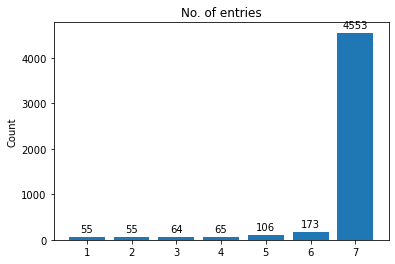

In [7]:
data0 = data[["cid","datadate"]].groupby("cid").count().reset_index().groupby("datadate").count().reset_index().rename(columns={"cid":"count", "datadate":"no. of entries"})
fig, ax = plt.subplots()
cnt = ax.bar(data0["no. of entries"], data0["count"])
ax.set_ylabel('Count')
ax.set_title('No. of entries')

for p in cnt:
    height = p.get_height()
    ax.annotate('{}'.format(height),
    xy=(p.get_x() + p.get_width() / 2, height),
    xytext=(0, 3), # 3 points vertical offset
    textcoords="offset points",
    ha='center', va='bottom')

In [8]:
from sklearn.naive_bayes import MultinomialNB
import sklearn.naive_bayes as nb
from sklearn.feature_extraction.text import CountVectorizer

In [9]:
# normal dataset
data_text = data[["busdesc","FFI12_desc", "AUDIT_FEES"]]

# dataset without NA AUDIT_FEES
data_audit_text = data_audit[["busdesc","FFI12_desc", "AUDIT_FEES"]]

In [10]:
data_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34056 entries, 0 to 34055
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   busdesc     34056 non-null  object 
 1   FFI12_desc  34056 non-null  object 
 2   AUDIT_FEES  22795 non-null  float64
dtypes: float64(1), object(2)
memory usage: 798.3+ KB


In [11]:
data_audit_text.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22795 entries, 0 to 34055
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   busdesc     22795 non-null  object 
 1   FFI12_desc  22795 non-null  object 
 2   AUDIT_FEES  22795 non-null  float64
dtypes: float64(1), object(2)
memory usage: 712.3+ KB


In [12]:
# replace Na values with 0 for normal dataset
def auditFeesDummy(auditFees):
    if pd.isna(auditFees):
        return 0
    return 1

data_text["AUDIT_FEES"] = data_text["AUDIT_FEES"].apply(auditFeesDummy)

<ipython-input-12-03412ef5c562>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_text["AUDIT_FEES"] = data_text["AUDIT_FEES"].apply(auditFeesDummy)


In [13]:
data_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34056 entries, 0 to 34055
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   busdesc     34056 non-null  object
 1   FFI12_desc  34056 non-null  object
 2   AUDIT_FEES  34056 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 798.3+ KB


In [14]:
data_text["words"] = data_text["busdesc"] + " " + data_text["FFI12_desc"]
data_text= data_text[["AUDIT_FEES", "words"]]

data_audit_text["words"] = data_audit_text["busdesc"] + " " + data_audit_text["FFI12_desc"]
data_audit_text = data_audit_text[["AUDIT_FEES", "words"]]

<ipython-input-14-799b55d87cfa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_text["words"] = data_text["busdesc"] + " " + data_text["FFI12_desc"]
<ipython-input-14-799b55d87cfa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_audit_text["words"] = data_audit_text["busdesc"] + " " + data_audit_text["FFI12_desc"]


In [15]:
# groupby so only one entry per unique description
data_text = data_text.groupby("words").max().reset_index()

In [16]:
# remove punctuations from "word" variable
words_cleaned = []
for row in data_text["words"]:
    sentence_cleaned = []
    for word in row.split():
        word = word.strip("'/,.!@#$%^&*()-_1234567890=+[]\{\}\|\";:><?`~").lower()
        sentence_cleaned.append(word)
    words_cleaned.append(" ".join(sentence_cleaned))
data_text["words"] = words_cleaned

In [17]:
cv = CountVectorizer(stop_words={'english'}, max_df=0.001) 
cv_matrix = cv.fit_transform(data_text["words"])
X = pd.DataFrame(cv_matrix.toarray(), columns=cv.get_feature_names())
X

,aaic,aamt,aaon,abaloparatide,abatement,abb,abbott,abbvie,abeona,abercrombie,...,ztest,zto,zulresso,zulu,zumiez,zw,zymeworks,zynerba,zynex,zynga
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5209,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5210,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5211,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5212,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
clf1 = MultinomialNB()
clf1.fit(X, data_text["AUDIT_FEES"])

MultinomialNB()

In [19]:
prob_df = pd.DataFrame([[X.columns[i], clf1.feature_log_prob_[0][i], clf1.feature_log_prob_[1][i]] for i in range(len(X.columns))], 
                        columns=["word", "0_prob", "1_prob"])
prob_df.head()

,word,0_prob,1_prob
0,aaic,-9.515027,-9.157783
1,aamt,-9.515027,-9.157783
2,aaon,-9.515027,-9.157783
3,abaloparatide,-9.515027,-9.157783
4,abatement,-9.515027,-9.157783


In [20]:
prob_df.sort_values(by= ["0_prob"], ignore_index=True, ascending=False).iloc[0:10]

,word,0_prob,1_prob
0,cruises,-7.117132,-9.850930
1,containerships,-7.317802,-9.850930
2,minco,-7.317802,-9.850930
3,maple,-7.435586,-9.850930
4,railway,-7.435586,-9.850930
5,reservoir,-7.435586,-9.850930
6,romania,-7.435586,-9.850930
7,upm,-7.435586,-9.850930
8,lpg,-7.435586,-9.850930
9,cruise,-7.569117,-9.157783


In [21]:
prob_df.sort_values(by= ["1_prob"], ignore_index=True, ascending=False).iloc[0:10]

,word,0_prob,1_prob
0,propane,-8.416415,-7.548345
1,spa,-8.416415,-7.653706
2,flat,-9.515027,-7.771489
3,annuity,-9.515027,-7.771489
4,led,-8.821880,-7.771489
5,tennessee,-9.515027,-7.771489
6,sino,-9.515027,-7.771489
7,dc,-9.515027,-7.771489
8,snack,-9.515027,-7.771489
9,concept,-9.515027,-7.771489


In [22]:
for row in data_text.words:
    if "?" in row:
        print(row)

---

In [25]:
# remove punctuations and numbers from the words
words_cleaned = []
for row in data_audit_text["words"]:
    sentence_cleaned = []
    for word in row.split():
        word = word.strip("'/,.!@#$%^&*()-_1234567890=+[]\{\}\|\";:><?`~").lower()
        sentence_cleaned.append(word)
    words_cleaned.append(" ".join(sentence_cleaned))
data_audit_text["words"] = words_cleaned

# group by busdesc to remove duplicate records, take the mean AUDIT_FEES for duplicate records of busdesc
data_audit_text = data_audit_text.groupby("words").mean().reset_index()
data_audit_text.head()

,words,AUDIT_FEES
0,a m castle co together with its subsidiaries o...,1.251374e+06
1,a networks inc provides networking solutions i...,1.129227e+06
2,a o smith corporation manufactures and markets...,1.494571e+06
3,a-mark precious metals inc together with its s...,6.337143e+05
4,aaon inc together with its subsidiaries engage...,4.787036e+05


A good ESG rating means a company is managing its environment, social, and governance risks well relative to its peers. A poor ESG rating is the opposite -- the company has relatively higher unmanaged exposure to ESG risks.

In [26]:
data_audit_text.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
AUDIT_FEES,3580.0,2583089.75,5243687.81,5500.0,374112.89,1111010.71,2615554.88,77914285.71


In [27]:
# use the mean to classify high and low audit fees
def auditFees_categories(AUDIT_FEES):
    if AUDIT_FEES >= 2583089.75:
        return "High"
        
    return "Low"

data_audit_text.loc[:,"AUDIT_FEES"] = data_audit_text.loc[:,"AUDIT_FEES"].apply(auditFees_categories)

In [28]:
data_audit_text.head()

,words,AUDIT_FEES
0,a m castle co together with its subsidiaries o...,Low
1,a networks inc provides networking solutions i...,Low
2,a o smith corporation manufactures and markets...,Low
3,a-mark precious metals inc together with its s...,Low
4,aaon inc together with its subsidiaries engage...,Low


In [101]:
cv = CountVectorizer(stop_words={'english'}, max_df=0.01)
cv_matrix = cv.fit_transform(data_audit_text["words"])
X = pd.DataFrame(cv_matrix.toarray(), columns=cv.get_feature_names())


MultinomialNB()

In [158]:
clf2 = MultinomialNB()
clf2.fit(X, data_audit_text["AUDIT_FEES"])

(3580, 7830)

In [102]:
cols = ["word"] + clf2.classes_.tolist()
prob_df = pd.DataFrame([[X.columns[i], clf2.feature_log_prob_[0][i], clf2.feature_log_prob_[1][i]] for i in range(len(X.columns))], 
                        columns=cols)
prob_df.head()

,word,High,Low
0,aaic,-9.510371,-9.528503
1,aamt,-9.510371,-9.528503
2,aaon,-9.510371,-9.528503
3,abaloparatide,-9.510371,-9.528503
4,abatement,-8.817224,-10.221650


In [103]:
prob_df.sort_values(by="High", ignore_index=True, ascending=False).iloc[0:10]

,word,High,Low
0,packaging,-6.291495,-7.736744
1,beverage,-6.619999,-8.275740
2,vehicle,-6.677158,-7.388437
3,parts,-6.737782,-7.130608
4,casualty,-6.737782,-7.130608
5,education,-6.737782,-7.043597
6,network,-6.737782,-6.925813
7,networks,-6.802321,-7.582593
8,process,-6.802321,-7.277211
9,chemical,-6.802321,-7.449062


In [104]:
prob_df.sort_values(by= ["Low"], ignore_index=True, ascending=False).iloc[0:10]

,word,High,Low
0,deposit,-8.817224,-6.350449
1,homes,-9.510371,-6.414988
2,self,-7.900933,-6.437461
3,accounts,-9.510371,-6.460450
4,deposits,-8.817224,-6.460450
5,medicines,-8.411759,-6.638131
6,land,-8.411759,-6.638131
7,demand,-8.817224,-6.666302
8,treat,-9.510371,-6.666302
9,debt,-8.124077,-6.666302


In [106]:
for row in data_audit_text.words:
    if "?" in row:
        print(row)

In [157]:
data_audit[data_audit["busdesc"].str.contains("debt")].FFI12_desc.value_counts()
# FKIN INTERESTING

Money    215
Name: FFI12_desc, dtype: int64

---

In [280]:
import datetime as dt
import sys


def load_masterdictionary(file_path, print_flag=False, f_log=None, get_other=False):
    start_local = dt.datetime.now()
    # Setup dictionaries
    _master_dictionary = {}
    _sentiment_categories = ['negative', 'positive', 'uncertainty', 'litigious', 
                             'strong_modal', 'weak_modal', 'constraining']
    _sentiment_dictionaries = dict()
    for sentiment in _sentiment_categories:
        _sentiment_dictionaries[sentiment] = dict()
   
    # Load slightly modified common stopwords. 
    # Dropped from traditional: A, I, S, T, DON, WILL, AGAINST
    # Added: AMONG
    _stopwords = ['ME', 'MY', 'MYSELF', 'WE', 'OUR', 'OURS', 'OURSELVES', 'YOU', 'YOUR', 'YOURS',
                  'YOURSELF', 'YOURSELVES', 'HE', 'HIM', 'HIS', 'HIMSELF', 'SHE', 'HER', 'HERS', 'HERSELF',
                  'IT', 'ITS', 'ITSELF', 'THEY', 'THEM', 'THEIR', 'THEIRS', 'THEMSELVES', 'WHAT', 'WHICH',
                  'WHO', 'WHOM', 'THIS', 'THAT', 'THESE', 'THOSE', 'AM', 'IS', 'ARE', 'WAS', 'WERE', 'BE',
                  'BEEN', 'BEING', 'HAVE', 'HAS', 'HAD', 'HAVING', 'DO', 'DOES', 'DID', 'DOING', 'AN',
                  'THE', 'AND', 'BUT', 'IF', 'OR', 'BECAUSE', 'AS', 'UNTIL', 'WHILE', 'OF', 'AT', 'BY',
                  'FOR', 'WITH', 'ABOUT', 'BETWEEN', 'INTO', 'THROUGH', 'DURING', 'BEFORE',
                  'AFTER', 'ABOVE', 'BELOW', 'TO', 'FROM', 'UP', 'DOWN', 'IN', 'OUT', 'ON', 'OFF', 'OVER',
                  'UNDER', 'AGAIN', 'FURTHER', 'THEN', 'ONCE', 'HERE', 'THERE', 'WHEN', 'WHERE', 'WHY',
                  'HOW', 'ALL', 'ANY', 'BOTH', 'EACH', 'FEW', 'MORE', 'MOST', 'OTHER', 'SOME', 'SUCH',
                  'NO', 'NOR', 'NOT', 'ONLY', 'OWN', 'SAME', 'SO', 'THAN', 'TOO', 'VERY', 'CAN',
                  'JUST', 'SHOULD', 'NOW', 'AMONG']

    # Loop thru words and load dictionaries
    with open(file_path) as f:
        _total_documents = 0
        _md_header = f.readline()  # Consume header line
        print()
        for line in f:
            cols = line.rstrip('\n').split(',')
            word = cols[0]
            _master_dictionary[word] = MasterDictionary(cols, _stopwords)
            for sentiment in _sentiment_categories:
                if getattr(_master_dictionary[word], sentiment):
                    _sentiment_dictionaries[sentiment][word] = 0
            _total_documents += _master_dictionary[cols[0]].doc_count
            if len(_master_dictionary) % 5000 == 0 and print_flag:
                print(f'\r ...Loading Master Dictionary {len(_master_dictionary):,}', end='', flush=True)

    if print_flag:
        print('\r', end='')  # clear line
        print(f'\nMaster Dictionary loaded from file:\n  {file_path}\n')
        print(f'  master_dictionary has {len(_master_dictionary):,} words.\n')

    if f_log:
        try:
            f_log.write('\n\n  FUNCTION: load_masterdictionary' +
                        '(file_path, print_flag, f_log, get_other)\n')
            f_log.write(f'\n    file_path  = {file_path}')
            f_log.write(f'\n    print_flag = {print_flag}')
            f_log.write(f'\n    f_log      = {f_log.name}')
            f_log.write(f'\n    get_other  = {get_other}')
            f_log.write(f'\n\n    {len(_master_dictionary):,} words loaded in master_dictionary.\n')
            f_log.write(f'\n    Sentiment:')
            for sentiment in _sentiment_categories:
                f_log.write(f'\n      {sentiment:13}: {len(_sentiment_dictionaries[sentiment]):8,}')
            f_log.write(f'\n\n  END FUNCTION: load_masterdictionary: {(dt.datetime.now()-start_local)}')
        except Exception as e:
            print('Log file in load_masterdictionary is not available for writing')
            print(f'Error = {e}')

    if get_other:
        return _master_dictionary, _md_header, _sentiment_categories, _sentiment_dictionaries, _stopwords, _total_documents
    else:
        return _master_dictionary


class MasterDictionary:
    def __init__(self, cols, _stopwords):
        for ptr, col in enumerate(cols):
            if col == '':
                cols[ptr] = '0'
        try:
            self.word = cols[0].upper()
            self.sequence_number = int(cols[1])    
            self.word_count = int(cols[2])
            self.word_proportion = float(cols[3])
            self.average_proportion = float(cols[4])
            self.std_dev_prop = float(cols[5])
            self.doc_count = int(cols[6])
            self.negative = int(cols[7])
            self.positive = int(cols[8])
            self.uncertainty = int(cols[9])
            self.litigious = int(cols[10])
            self.strong_modal = int(cols[11])
            self.weak_modal = int(cols[12])
            self.constraining = int(cols[13])
            self.syllables = int(cols[14])
            self.source = cols[15]
            if self.word in _stopwords:
                self.stopword = True
            else:
                self.stopword = False
        except:
            print('ERROR in class MasterDictionary')
            print(f'word = {cols[0]} : seqnum = {cols[1]}')
            quit()
        return



if __name__ == '__main__':
    start = dt.datetime.now()
    print(f'\n\n{start.strftime("%c")}\nPROGRAM NAME: {sys.argv[0]}\n')
    f_log = open('D:\Temp\Load_MD_Logfile.txt', 'w')
    md = ('data/Loughran-McDonald_MasterDictionary_1993-2021.csv')
    master_dictionary, md_header, sentiment_categories, sentiment_dictionaries, stopwords, total_documents = \
        load_masterdictionary(md, True, f_log, True)
    print(f'\n\nRuntime: {(dt.datetime.now()-start)}')
    print(f'\nNormal termination.\n{dt.datetime.now().strftime("%c")}\n')



Thu Mar 31 21:37:40 2022
PROGRAM NAME: /Users/cherylperyl/opt/anaconda3/lib/python3.8/site-packages/ipykernel_launcher.py


 ...Loading Master Dictionary 85,000
Master Dictionary loaded from file:
  data/Loughran-McDonald_MasterDictionary_1993-2021.csv

  master_dictionary has 86,531 words.



Runtime: 0:00:01.291517

Normal termination.
Thu Mar 31 21:37:41 2022



In [281]:
sentiment_categories

['negative',
 'positive',
 'uncertainty',
 'litigious',
 'strong_modal',
 'weak_modal',
 'constraining']

In [282]:
sentiment_dictionaries

{'negative': {'ABANDON': 0,
  'ABANDONED': 0,
  'ABANDONING': 0,
  'ABANDONMENT': 0,
  'ABANDONMENTS': 0,
  'ABANDONS': 0,
  'ABDICATED': 0,
  'ABDICATES': 0,
  'ABDICATING': 0,
  'ABDICATION': 0,
  'ABDICATIONS': 0,
  'ABERRANT': 0,
  'ABERRATION': 0,
  'ABERRATIONAL': 0,
  'ABERRATIONS': 0,
  'ABETTING': 0,
  'ABNORMAL': 0,
  'ABNORMALITIES': 0,
  'ABNORMALITY': 0,
  'ABNORMALLY': 0,
  'ABOLISH': 0,
  'ABOLISHED': 0,
  'ABOLISHES': 0,
  'ABOLISHING': 0,
  'ABROGATE': 0,
  'ABROGATED': 0,
  'ABROGATES': 0,
  'ABROGATING': 0,
  'ABROGATION': 0,
  'ABROGATIONS': 0,
  'ABRUPT': 0,
  'ABRUPTLY': 0,
  'ABRUPTNESS': 0,
  'ABSENCE': 0,
  'ABSENCES': 0,
  'ABSENTEEISM': 0,
  'ABUSE': 0,
  'ABUSED': 0,
  'ABUSES': 0,
  'ABUSING': 0,
  'ABUSIVE': 0,
  'ABUSIVELY': 0,
  'ABUSIVENESS': 0,
  'ACCIDENT': 0,
  'ACCIDENTAL': 0,
  'ACCIDENTALLY': 0,
  'ACCIDENTS': 0,
  'ACCUSATION': 0,
  'ACCUSATIONS': 0,
  'ACCUSE': 0,
  'ACCUSED': 0,
  'ACCUSES': 0,
  'ACCUSING': 0,
  'ACQUIESCE': 0,
  'ACQUIESCED':

---

# Trying to transform variables

In [23]:
data_audit_final = data_audit[["emp", "at", "profit_margin", "der", "cr", "pctg_invt_at", "pctg_ppe_at", "d_fortune", "BIG4", "intan", "auop", "AUDIT_FEES"]]

In [25]:
data_audit_final["log_at"] = np.log(data_audit_final["at"]+1)
data_audit_final["log_emp"] = np.log(data_audit_final["emp"]+1)
data_audit_final["log_profit_margin"] = np.log(data_audit_final["profit_margin"]+1)
data_audit_final["log_der"] = np.log(data_audit_final["der"]+1)
data_audit_final["log_cr"] = np.log(data_audit_final["cr"]+1)
data_audit_final["log_pctg_invt_at"] = np.log(data_audit_final["pctg_invt_at"]+1)
data_audit_final["log_pctg_ppe_at"] = np.log(data_audit_final["pctg_ppe_at"]+1)
data_audit_final["log_intan"] = np.log(data_audit_final["intan"]+1)
data_audit_final["log_auop"] = np.log(data_audit_final["auop"]+1)

<ipython-input-25-43422a7993f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_audit_final["log_at"] = np.log(data_audit_final["at"]+1)
<ipython-input-25-43422a7993f4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_audit_final["log_emp"] = np.log(data_audit_final["emp"]+1)
/Users/cherylperyl/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-25-43422a7993f4>

In [26]:
data_audit_final1 = data_audit_final[["log_emp", "log_at", "log_profit_margin", "log_der", "log_cr", 
                                "log_pctg_invt_at", "log_pctg_ppe_at", "d_fortune", "BIG4", 
                                "log_intan", "log_auop", "AUDIT_FEES"]]

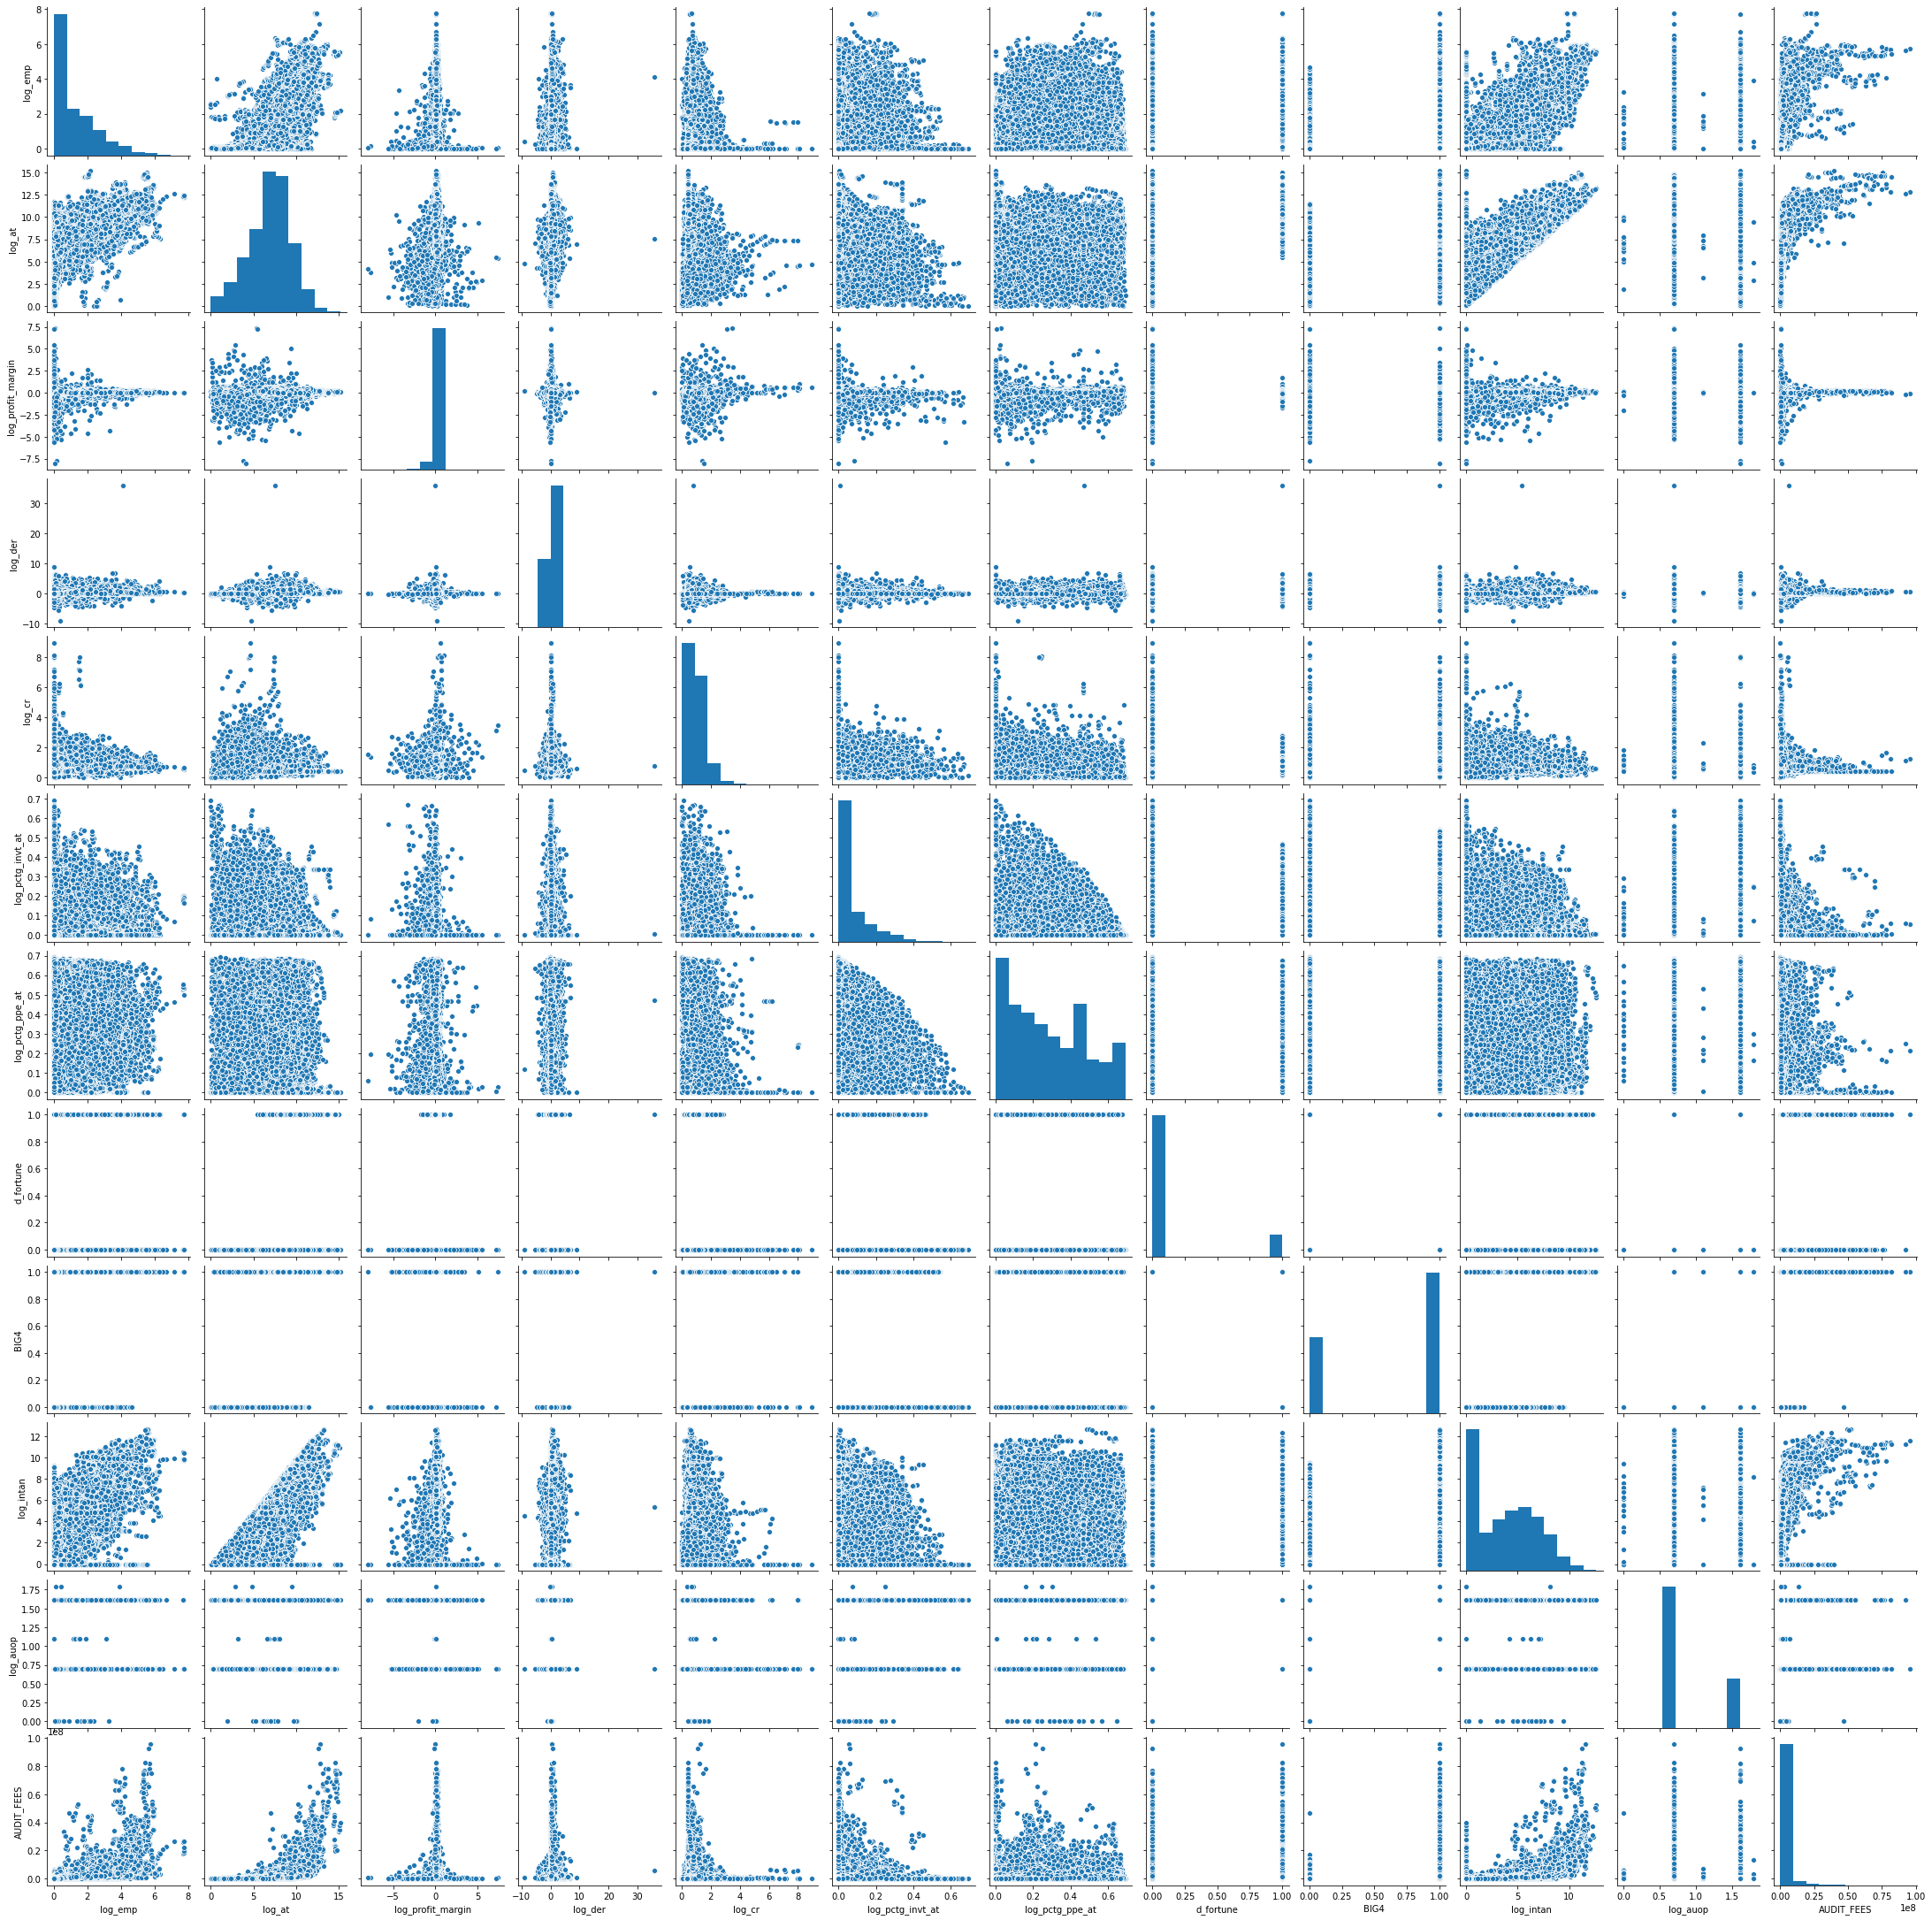

In [27]:
sns.pairplot(data_audit_final1)